In [1]:
import fairness as fair
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example Dataset Generation

In [2]:
np.random.seed(42)
df = pd.DataFrame({
    'predicted_mortality': np.random.randint(0, 2, size=1000),
    'actual_mortality': np.random.randint(0, 2, size=1000),
    'ethnicity': np.random.choice(['White', 'Black', 'Hispanic', 'Asian'], size=1000),
    'gender': np.random.choice(['Male', 'Female'], size=1000)
})

df.loc[:500, "predicted_mortality"] = df.loc[:500, "actual_mortality"]  # Set first 750 rows of predicted_mortality to actual_mortality

# Set parameters for fairness evaluation as you see fit
demographic = 'ethnicity'
fairness_threshold = 0.05
# ratio_threshold = 1.2 # optional paramter used in disparate_impact_ratio function
predicted_outcome = 'predicted_mortality'
actual_outcome = 'actual_mortality'

plt.ioff()  # Disable interactive mode for matplotlib

evaluated_metrics = fair.evaluate_fairness(
    df,
    demographic,
    predicted_outcome,
    actual_outcome,
    fairness_threshold
)

plt.close('all')  # Close all matplotlib figures to avoid display issues in some environments

c:\Users\fredr\CS Projects\Fairness\fairness.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy = icu_data.groupby(demographic_group).apply(
c:\Users\fredr\CS Projects\Fairness\fairness.py:42: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  f1_scores = icu_data.groupby(demographic_group).apply(


# Accuracy Result

In [3]:
accuracy_result = evaluated_metrics['accuracy']
print("Accuracy by demographic group:")
print(accuracy_result['accuracy'])
print("Disparity:", accuracy_result['disparity'])    
print("Is the model fair?", accuracy_result['is_fair'])

Accuracy by demographic group:
ethnicity
Asian       0.759336
Black       0.709302
Hispanic    0.733333
White       0.762452
dtype: float64
Disparity: 0.05314978169829809
Is the model fair? False


# F1 Result

In [4]:
f1_result = evaluated_metrics['f1_score']
print("\nF1 Score by demographic group:")
print(f1_result['f1_scores'])    
print("Disparity:", f1_result['disparity'])    
print("Is the model fair?", f1_result['is_fair'])    


F1 Score by demographic group:
ethnicity
Asian       0.747826
Black       0.698795
Hispanic    0.731092
White       0.750000
dtype: float64
Disparity: 0.051204819277108404
Is the model fair? False


# Equalized Odds Result

In [5]:
equalized_odds_result = evaluated_metrics['equalized_odds']
print("\nTPR by demographic group:")
print(equalized_odds_result['tpr'])    
print("Disparity:", equalized_odds_result['tpr_disparity'])    
print("\nFPR by demographic group:")
print(equalized_odds_result['fpr'])    
print("Disparity:", equalized_odds_result['fpr_disparity'])  
print("Is the model fair?", equalized_odds_result['is_fair'])   



TPR by demographic group:
ethnicity
Asian       0.741379
Black       0.719008
Hispanic    0.743590
White       0.775000
dtype: float64
Disparity: 0.05599173553719006

FPR by demographic group:
ethnicity
Asian       0.224000
Black       0.299270
Hispanic    0.276423
White       0.248227
dtype: float64
Disparity: 0.07527007299270075
Is the model fair? False


# Disparate Impact Ratio Result

In [6]:
disparate_impact_result = evaluated_metrics['disparate_impact_ratio']
print("\nDisparate Impact Ratio by demographic group:")
print(disparate_impact_result['positive_prediction_rate'])    
print("Ratio:", disparate_impact_result['disparity'])    
print("Is the model fair?", disparate_impact_result['is_fair'])   


Disparate Impact Ratio by demographic group:
ethnicity
Asian       0.473029
Black       0.496124
Hispanic    0.504167
White       0.490421
Name: predicted_mortality, dtype: float64
Ratio: 1.0658260233918129
Is the model fair? True


# ROC Curves

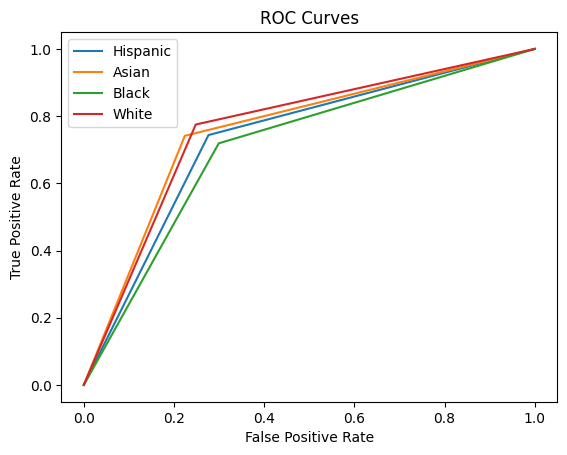

In [7]:
roc_curves = fair.roc_analysis(df, demographic, predicted_outcome, actual_outcome)

# Calibration Plot

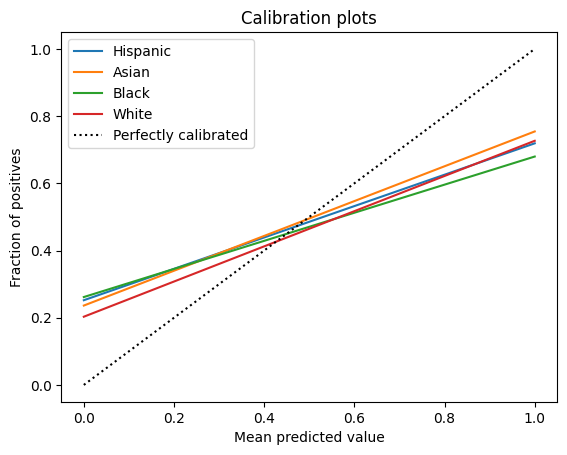

In [8]:
calibration_curves = fair.calibration_analysis(df, demographic, predicted_outcome, actual_outcome)

# Decision Analysis Curves

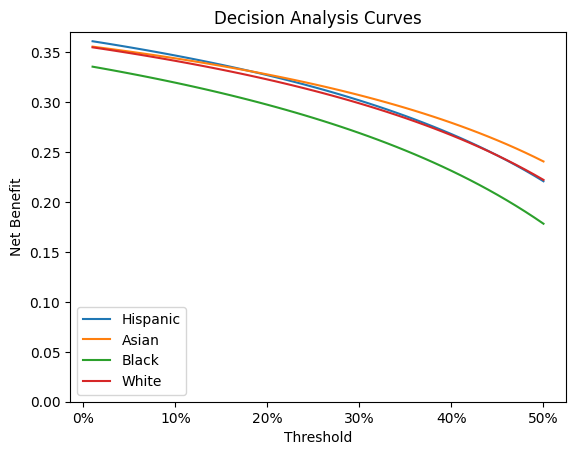

In [9]:
dca_curves = fair.decision_analysis(df, demographic, predicted_outcome, actual_outcome)